In [11]:
from os import walk
import pickle
import pandas as pd

BLOG_PATH = "../data/blog"

data = {}

for _, _, filenames in walk(BLOG_PATH):
    for filename in filenames:
        file_full_path = BLOG_PATH + "/" + filename
        with open(file_full_path, "rb") as file:
            data[filename.replace(".txt", "")] = pickle.load(file)
            
data_combined = {key: [value] for (key, value) in data.items()}
anios = [key for key, _ in data.items()]
print(data_combined)

{'2004': ['Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácora (una herramienta de publicación cronológica de contenidos en internet) para contar una historia costumbrista desde la subjetiva de un ama de casa argentina de clase media. La repercusión del proyecto fue tan asombrosa que me gustaría compartir algunos detalles con el lector.La idea nació como un juego en el que intenté hacer un pequeño homenaje a mi ciudad natal, Mercedes, o al menos sentirme cerca de su gente; increíblemente, y a pesar de la enorme cantidad de lectores de otos países que se interesaron por la historia, su desarrollo nunca perdió del todo esa mínima premisa. Ese logro, por supuesto, no fue mío sino de los comentaristas y seguidores del relato.Durante todo el proceso quise generar la ilusión de que la protagonista de la historia —Mirta Bertotti— escribía realmente un diario personal, ayudada en la parte técnica po

In [12]:
pd.set_option('max_colwidth',150)
 
data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
2004,"Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácor..."
2005,"Nunca en la puta vida me hubiera imaginado que el diario, siempre plagado de maremotos y de incendios de discotecas, pudiera traer alguna vez una ..."
2006,"Más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros, o no firmados pero sí apro..."
2007,"Desde hace días la Nina quiere interactuar conmigo. Todavía es prematuro decir que intenta tener una relación estable, pero ya empiezo a oír los e..."
2008,"De pronto yo estaba en el hogar donde pasé la infancia; lo supo primero mi nariz. Los ojos se acostumbran tarde a la penumbra, pero mi olfato reco..."
2009,"Google ha lanzado esta semana Latitude, un servicio gratuito que permite ubicar -mediante el celular- a los contactos de la agenda que den su cons..."
2010,"Leo en la prensa económica que, entre las varias empresas que tienen pensado salir a bolsa este año, se encuentra Polaroid, y me sorprende leer el..."
2011,"Esto pasó ayer: Chichita caminaba por una playa desierta, en Mar Azul, costa atlántica argentina, con su revista y su sombrilla, y unos chicos dij..."
2012,"Escribo esto justo cuando el contador llega a dos mil. Por lo tanto, mantenemos el ritmo a pesar de los días de turrones y petardos. Mientras nace..."
2013,"Menos de once segundos antes, cuando el jugador argentino recibe el pase de un compañero, el reloj en México marca las trece horas, doce minutos y..."


In [13]:
import re
import string

def apply_lowercase_remove_characters(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

def remove_punctuation(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text

 
data_clean = pd.DataFrame(data_df.transcript.apply(lambda x: apply_lowercase_remove_characters(x)))
data_clean = pd.DataFrame(data_clean.transcript.apply(lambda x: remove_punctuation(x)))
data_clean

data_df.to_pickle("corpus.pkl")

In [25]:
import sklearn
print(sklearn.__version__)


1.3.0


In [23]:
!pip install --upgrade scikit-learn
# or
#conda update scikit-learn



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# assuming you have some corpus of texts in `data_clean.transcript`
corpus = data_clean.transcript

with open('../data/spanish.txt') as f:
    lines = f.read().splitlines()

    
vectorizer = CountVectorizer(stop_words=lines)
X = vectorizer.fit_transform(corpus)

# The get_feature_names method should work here without throwing an AttributeError
feature_names = vectorizer.get_feature_names_out()

# converting matrix to Dataframe
data_dtm = pd.DataFrame(X.toarray(), columns=feature_names)
data_dtm.index = data_clean.index

data_dtm.to_pickle("dtm.pkl")
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))
data_dtm

C:\Users\ACER\Desktop\nlp\myenv\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ais', 'amos', 'an', 'as', 'bamos', 'estarã', 'estuviã', 'estã', 'fuã', 'habrã', 'habã', 'hayã', 'hubiã', 'is', 'mã', 'quã', 'ramos', 'semos', 'serã', 'seã', 'sã', 'tambiã', 'tendrã', 'tengã', 'tenã', 'tuviã', 'tãº'] not in stop_words.
  warnings.warn(


,abajo,abananados,abandonaba,abandonado,abandonar,abandonaron,abandoné,abandonó,abanico,abaraja,...,único,únicos,útero,útil,útiles,útimo,českomoravský,české,šeredova,šeredovà
2004,10,0,1,1,0,0,0,0,0,0,...,11,0,0,3,0,1,0,0,0,0
2005,15,0,0,0,0,1,0,0,0,0,...,17,0,3,3,0,0,0,0,0,0
2006,4,0,0,0,0,0,0,0,0,0,...,13,1,0,2,0,0,0,0,0,0
2007,9,0,0,0,1,0,0,0,0,0,...,9,0,0,1,0,0,0,0,0,0
2008,9,0,0,0,0,1,0,1,0,0,...,15,0,0,5,0,0,1,1,1,2
2009,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,2,0,0,0,0,0
2010,8,0,0,0,2,0,0,0,0,0,...,9,0,0,2,0,0,0,0,0,0
2011,7,0,0,0,0,0,0,0,0,0,...,16,4,0,1,0,0,0,0,0,0
2012,8,0,1,0,0,0,0,0,0,1,...,7,1,0,1,0,0,0,0,0,0
2013,0,0,0,0,0,0,0,0,1,0,...,6,1,0,0,0,0,0,0,0,0


In [29]:
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
abajo,10,15,4,9,9,0,8,7,8,0,13,6
abananados,0,0,0,0,0,0,0,0,0,0,1,0
abandonaba,1,0,0,0,0,0,0,0,1,0,0,0
abandonado,1,0,0,0,0,0,0,0,0,0,0,0
abandonar,0,0,0,1,0,0,2,0,0,0,0,0


In [30]:
top_dict = {}
for c in data.columns: # Años
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
#print(top_dict)
# Print the top 15 words by year
for anio, top_words in top_dict.items():
    print(anio)
    print(', '.join([word for word, count in top_words[0:14]]))

2004
más, qué, si, alex, vez, había, lucas, cada, dos, ahora, también, está, ser, después
2005
más, si, qué, está, dos, vez, años, siempre, ser, también, vida, había, tiempo, hace
2006
más, si, qué, años, dos, vez, siempre, había, está, hace, mundo, ser, ahora, entonces
2007
más, qué, si, siempre, dos, también, había, entonces, años, vez, está, nunca, sólo, ahora
2008
más, dos, si, años, había, casa, qué, vez, también, ahora, después, entonces, siempre, hace
2009
más, años, si, había, también, ahora, casa, vez, después, andrés, qué, ser, dos, él
2010
revista, más, chiri, si, años, qué, orsai, también, está, cada, hacer, dos, ahora, ser
2011
más, orsai, revista, número, lectores, había, dos, si, qué, vez, chiri, también, está, años
2012
más, orsai, dos, cada, si, qué, revista, vez, dijo, había, está, chiri, también, él
2013
más, había, si, dos, años, qué, cada, dijo, papelitos, ve, después, ahora, vez, tres
2014
si, más, qué, vez, dos, años, había, después, tres, cada, siempre, casa, se

In [31]:
from collections import Counter

# Let's first pull out the top 30 words for each anio
words = []
for anio in data.columns:
    top = [word for (word, count) in top_dict[anio]]
    for t in top:
        words.append(t)
print(Counter(words).most_common())
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[('más', 12), ('qué', 12), ('si', 12), ('vez', 12), ('dos', 12), ('ahora', 12), ('después', 12), ('años', 12), ('hace', 12), ('había', 11), ('cada', 11), ('también', 11), ('casa', 11), ('está', 10), ('ser', 9), ('siempre', 9), ('mundo', 9), ('día', 9), ('hacer', 9), ('vida', 8), ('nunca', 8), ('tiempo', 8), ('entonces', 8), ('mismo', 8), ('tres', 6), ('él', 6), ('chiri', 6), ('dijo', 5), ('cosas', 4), ('gente', 4), ('noche', 4), ('tarde', 4), ('bien', 3), ('sí', 3), ('veces', 3), ('tenía', 3), ('revista', 3), ('orsai', 3), ('lectores', 3), ('número', 3), ('alex', 2), ('lucas', 2), ('nadie', 2), ('así', 2), ('tan', 2), ('dice', 2), ('sólo', 2), ('decir', 2), ('mí', 2), ('revistas', 2), ('ver', 1), ('primera', 1), ('mujer', 1), ('hombre', 1), ('andrés', 1), ('gelós', 1), ('diez', 1), ('ustedes', 1), ('mejor', 1), ('proyecto', 1), ('idea', 1), ('cuatro', 1), ('semana', 1), ('argentina', 1), ('gordo', 1), ('cinco', 1), ('papelitos', 1), ('ve', 1), ('jugador', 1), ('libro', 1), ('bar', 1), 

['más',
 'qué',
 'si',
 'vez',
 'dos',
 'ahora',
 'después',
 'años',
 'hace',
 'había',
 'cada',
 'también',
 'casa',
 'está',
 'ser',
 'siempre',
 'mundo',
 'día',
 'hacer',
 'vida',
 'nunca',
 'tiempo',
 'entonces',
 'mismo']

In [35]:

from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
with open('../data/spanish.txt') as f:
    stop_words = f.read().splitlines()
for pal in add_stop_words:
    stop_words.append(pal)
more_stop_words=['alex','lucas','andrés','mirta','tres','primer','primera','dos','uno','veces', 'así', 'luego', 'quizá','cosa','cosas','tan','asi','andres','todas','sólo','jesús','pablo','pepe']
for pal in more_stop_words:
    stop_words.append(pal)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

C:\Users\ACER\Desktop\nlp\myenv\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ais', 'amos', 'an', 'as', 'bamos', 'estarã', 'estuviã', 'estã', 'fuã', 'habrã', 'habã', 'hayã', 'hubiã', 'is', 'mã', 'quã', 'ramos', 'semos', 'serã', 'seã', 'sã', 'tambiã', 'tendrã', 'tengã', 'tenã', 'tuviã', 'tãº'] not in stop_words.
  warnings.warn(


In [36]:
!pip install wordcloud

                                              0.0/151.4 kB ? eta -:--:--
     ----------------------------           112.6/151.4 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 151.4/151.4 kB 3.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


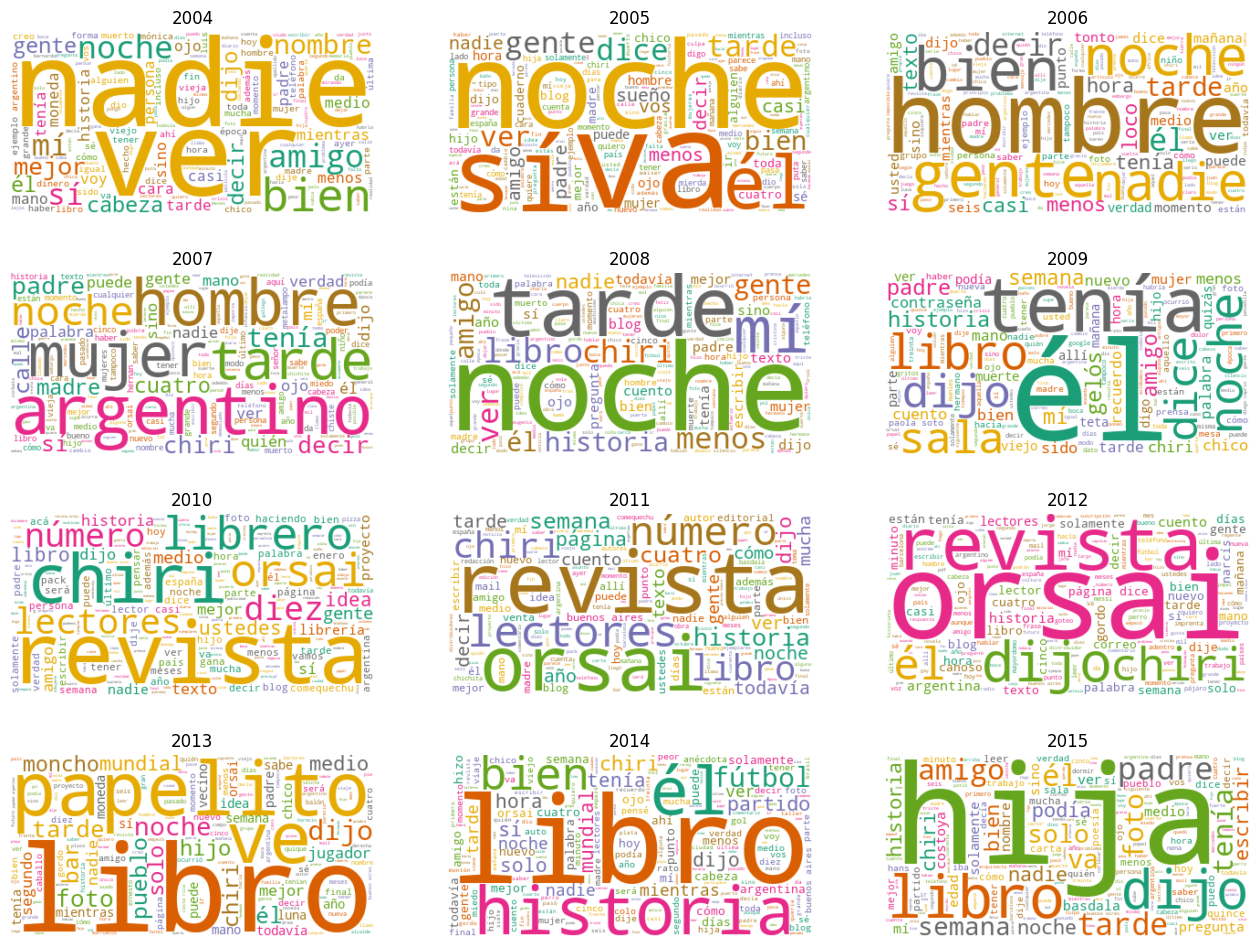

In [37]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]

# Create subplots for each anio
for index, anio in enumerate(data.columns):
    wc.generate(data_clean.transcript[anio])
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(anios[index])
plt.show()